In [107]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt
from tensorflow import keras

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [108]:
PATH = "../data/unpacked/characters"

characters = os.listdir(PATH)

im_arr=[]
lb_arr=[]
for i, character in enumerate(characters):
    path = os.path.join(PATH, character)

    for d in sorted(os.listdir(path)):
        img = cv2.imread(os.path.join(path, d),0)
        img = cv2.resize(img, (28, 28))

        temp_arr=img
        temp_arr=temp_arr[np.newaxis,:,:]
        if len(im_arr)==0:
            im_arr=temp_arr
        else:
            im_arr=np.concatenate((im_arr,temp_arr),axis=0)
        lb_arr.append(character)

In [109]:
# convert the labels to one-hot encoding
from sklearn import preprocessing

lb_arr=np.array(lb_arr)
le = preprocessing.LabelEncoder()
le.fit(lb_arr)
new_labels = le.transform(lb_arr)


Prepare the data

In [110]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(im_arr, new_labels, test_size=0.2, random_state=42, stratify=new_labels)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape

(4429, 28, 28)

In [119]:
# LeNet preprocces architecture
X_train, X_test, Y_train, Y_test = train_test_split(im_arr, new_labels, test_size=0.2, random_state=42, stratify=new_labels)

X_train = tf.pad(X_train, [[0, 0], [2,2], [2,2]])/255
X_test = tf.pad(X_test, [[0, 0], [2,2], [2,2]])/255


# expand dims for required input shape
X_train = tf.expand_dims(X_train, axis=3, name=None)
X_test = tf.expand_dims(X_test, axis=3, name=None)

X_train.shape

TensorShape([4429, 32, 32, 1])

In [120]:
# print the shapes of the data
print('----------LaNet preprocces architecture----------')
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("-----------Baseline preprocces architecture-----------")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


----------LaNet preprocces architecture----------
X_train shape: (4429, 32, 32, 1)
X_test shape: (1108, 32, 32, 1)
y_train shape: (4429,)
y_test shape: (1108,)
-----------Baseline preprocces architecture-----------
x_train shape: (4429, 28, 28)
x_test shape: (1108, 28, 28)
y_train shape: (4429,)
y_test shape: (1108,)


In [ ]:
#show an image
plt.imshow(x_train[0])

In [111]:
# Creating the model
base = models.Sequential([
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(27, activation='softmax')
])
base.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 4732)              0         
                                                                 
 dense_50 (Dense)            (None, 128)               605824    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 27)                3483      
                                                     

In [113]:
laNet = models.Sequential([
    layers.Conv2D(6,5, activation='tanh', input_shape=(32, 32, 1)),
    layers.AveragePooling2D(2),
    layers.Activation('sigmoid'),
    layers.Conv2D(16, 5, activation='tanh'),
    layers.AveragePooling2D(2),
    layers.Activation('sigmoid'),	
    layers.Conv2D(120, 5, activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(27, activation='softmax')
])

laNet.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_38 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 activation_44 (Activation)  (None, 14, 14, 6)         0         
                                                                 
 conv2d_76 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_39 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 activation_45 (Activation)  (None, 5, 5, 16)        

In [114]:
# print model shape
print(base.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 4732)              0         
                                                                 
 dense_50 (Dense)            (None, 128)               605824    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 27)                3483      
                                                     

In [115]:
laNet.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

base.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [116]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

In [117]:
base.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [118]:
history = base.fit(x=x_train, y=y_train, epochs=20,
                   validation_data=(x_test, y_test), callbacks=callbacks, batch_size=64, validation_split=0.2)

Epoch 1/20
70/70 [==============================] - 1s 7ms/step - loss: 1.6272 - accuracy: 0.5913 - val_loss: 0.7849 - val_accuracy: 0.8168
Epoch 2/20
70/70 [==============================] - 0s 6ms/step - loss: 0.7868 - accuracy: 0.7871 - val_loss: 0.5940 - val_accuracy: 0.8348
Epoch 3/20
70/70 [==============================] - 0s 6ms/step - loss: 0.6029 - accuracy: 0.8329 - val_loss: 0.4863 - val_accuracy: 0.8646
Epoch 4/20
70/70 [==============================] - 0s 6ms/step - loss: 0.4702 - accuracy: 0.8661 - val_loss: 0.4304 - val_accuracy: 0.8791
Epoch 5/20
70/70 [==============================] - 0s 6ms/step - loss: 0.3997 - accuracy: 0.8842 - val_loss: 0.3861 - val_accuracy: 0.8944
Epoch 6/20
70/70 [==============================] - 0s 6ms/step - loss: 0.3324 - accuracy: 0.9058 - val_loss: 0.3640 - val_accuracy: 0.9043
Epoch 7/20
70/70 [==============================] - 0s 6ms/step - loss: 0.2671 - accuracy: 0.9174 - val_loss: 0.3522 - val_accuracy: 0.9016
Epoch 8/20
70/70 [==

In [121]:
laNet.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [122]:
history_laNet = laNet.fit(x=X_train, y=Y_train, epochs=20,batch_size=64,
                   validation_data=(X_test, Y_test),callbacks=callbacks, validation_split=0.2)

Epoch 1/20
70/70 [==============================] - 1s 8ms/step - loss: 3.1349 - accuracy: 0.0510 - val_loss: 3.0989 - val_accuracy: 0.0542
Epoch 2/20
70/70 [==============================] - 0s 6ms/step - loss: 3.1046 - accuracy: 0.0551 - val_loss: 3.0819 - val_accuracy: 0.0560
Epoch 3/20
70/70 [==============================] - 0s 6ms/step - loss: 3.0058 - accuracy: 0.1197 - val_loss: 2.7257 - val_accuracy: 0.3944
Epoch 4/20
70/70 [==============================] - 0s 6ms/step - loss: 1.9896 - accuracy: 0.5448 - val_loss: 1.3672 - val_accuracy: 0.7211
Epoch 5/20
70/70 [==============================] - 0s 6ms/step - loss: 1.1830 - accuracy: 0.7333 - val_loss: 1.0111 - val_accuracy: 0.7545
Epoch 6/20
70/70 [==============================] - 0s 6ms/step - loss: 0.9468 - accuracy: 0.7697 - val_loss: 0.8426 - val_accuracy: 0.7807
Epoch 7/20
70/70 [==============================] - 0s 6ms/step - loss: 0.8227 - accuracy: 0.7851 - val_loss: 0.7345 - val_accuracy: 0.7996
Epoch 8/20
70/70 [==

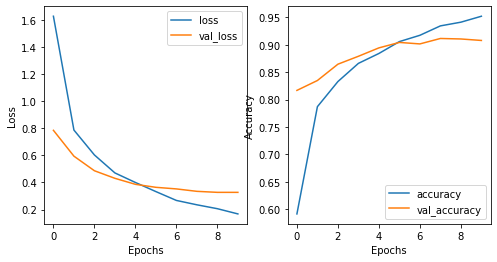

In [123]:
# plot the loss and accuracy curves for training and validation
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


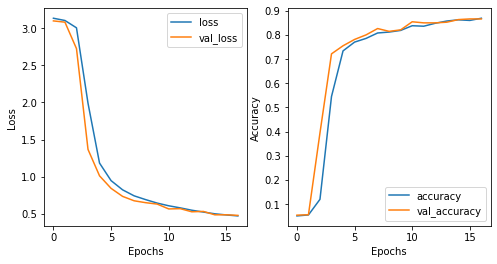

In [125]:
#plod lanet val
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history_laNet.history["loss"], label="loss")
plt.plot(history_laNet.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#plot model accuracy
plt.subplot(1, 2, 2)
plt.plot(history_laNet.history["accuracy"], label="accuracy")
plt.plot(history_laNet.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# #
# plt.subplot(1, 2, 2)
# plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
# plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
